In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import copy
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [48]:
df = pd.read_csv('CustomerChurn.csv')
df

,Call Failure,Complains,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Age Group,Tariff Plan,Status,Age,Customer Value,Churn
0,8,0,38,0,4370,71,5,17,3,1,1,30,197.640,0
1,0,0,39,0,318,5,7,4,2,1,2,25,46.035,0
2,10,0,37,0,2453,60,359,24,3,1,1,30,1536.520,0
3,10,0,38,0,4198,66,1,35,1,1,1,15,240.020,0
4,3,0,38,0,2393,58,2,33,1,1,1,15,145.805,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3145,21,0,19,2,6697,147,92,44,2,2,1,25,721.980,0
3146,17,0,17,1,9237,177,80,42,5,1,1,55,261.210,0
3147,13,0,18,4,3157,51,38,21,3,1,1,30,280.320,0
3148,7,0,11,2,4695,46,222,12,3,1,1,30,1077.640,0


In [49]:
#df.columns This is useful for quickly checking the names of the columns in your DataFrame.
df.columns

Index(['Call  Failure', 'Complains', 'Subscription  Length', 'Charge  Amount',
       'Seconds of Use', 'Frequency of use', 'Frequency of SMS',
       'Distinct Called Numbers', 'Age Group', 'Tariff Plan', 'Status', 'Age',
       'Customer Value', 'Churn'],
      dtype='object')

In [50]:
#data.isna().sum() will give you a Series where the index is the column names and the values are the counts of NaN values in each column.
df.isna().sum()

Call  Failure              0
Complains                  0
Subscription  Length       0
Charge  Amount             0
Seconds of Use             0
Frequency of use           0
Frequency of SMS           0
Distinct Called Numbers    0
Age Group                  0
Tariff Plan                0
Status                     0
Age                        0
Customer Value             0
Churn                      0
dtype: int64

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Call  Failure            3150 non-null   int64  
 1   Complains                3150 non-null   int64  
 2   Subscription  Length     3150 non-null   int64  
 3   Charge  Amount           3150 non-null   int64  
 4   Seconds of Use           3150 non-null   int64  
 5   Frequency of use         3150 non-null   int64  
 6   Frequency of SMS         3150 non-null   int64  
 7   Distinct Called Numbers  3150 non-null   int64  
 8   Age Group                3150 non-null   int64  
 9   Tariff Plan              3150 non-null   int64  
 10  Status                   3150 non-null   int64  
 11  Age                      3150 non-null   int64  
 12  Customer Value           3150 non-null   float64
 13  Churn                    3150 non-null   int64  
dtypes: float64(1), int64(13)

In [52]:
df.describe()

,Call Failure,Complains,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Age Group,Tariff Plan,Status,Age,Customer Value,Churn
count,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000
mean,7.627937,0.076508,32.541905,0.942857,4472.459683,69.460635,73.174921,23.509841,2.826032,1.077778,1.248254,30.998413,470.972916,0.157143
std,7.263886,0.265851,8.573482,1.521072,4197.908687,57.413308,112.237560,17.217337,0.892555,0.267864,0.432069,8.831095,517.015433,0.363993
min,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,15.000000,0.000000,0.000000
25%,1.000000,0.000000,30.000000,0.000000,1391.250000,27.000000,6.000000,10.000000,2.000000,1.000000,1.000000,25.000000,113.801250,0.000000
50%,6.000000,0.000000,35.000000,0.000000,2990.000000,54.000000,21.000000,21.000000,3.000000,1.000000,1.000000,30.000000,228.480000,0.000000
75%,12.000000,0.000000,38.000000,1.000000,6478.250000,95.000000,87.000000,34.000000,3.000000,1.000000,1.000000,30.000000,788.388750,0.000000
max,36.000000,1.000000,47.000000,10.000000,17090.000000,255.000000,522.000000,97.000000,5.000000,2.000000,2.000000,55.000000,2165.280000,1.000000


In [53]:
duplicated =df[df.duplicated()]
print('Before dropping duplicates:', df.shape[0])
print('Number of duplicate rows:', len(duplicated))

Before dropping duplicates: 3150
Number of duplicate rows: 300


In [54]:
data=df.drop_duplicates()
df["Status"] = df.Status.replace((1,2),(0,1))
df


,Call Failure,Complains,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Age Group,Tariff Plan,Status,Age,Customer Value,Churn
0,8,0,38,0,4370,71,5,17,3,1,0,30,197.640,0
1,0,0,39,0,318,5,7,4,2,1,1,25,46.035,0
2,10,0,37,0,2453,60,359,24,3,1,0,30,1536.520,0
3,10,0,38,0,4198,66,1,35,1,1,0,15,240.020,0
4,3,0,38,0,2393,58,2,33,1,1,0,15,145.805,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3145,21,0,19,2,6697,147,92,44,2,2,0,25,721.980,0
3146,17,0,17,1,9237,177,80,42,5,1,0,55,261.210,0
3147,13,0,18,4,3157,51,38,21,3,1,0,30,280.320,0
3148,7,0,11,2,4695,46,222,12,3,1,0,30,1077.640,0


In [55]:
print("statistical value:")
print(df.describe())#statistical propotion

statistical value:
       Call  Failure    Complains  Subscription  Length  Charge  Amount  \
count    3150.000000  3150.000000           3150.000000     3150.000000   
mean        7.627937     0.076508             32.541905        0.942857   
std         7.263886     0.265851              8.573482        1.521072   
min         0.000000     0.000000              3.000000        0.000000   
25%         1.000000     0.000000             30.000000        0.000000   
50%         6.000000     0.000000             35.000000        0.000000   
75%        12.000000     0.000000             38.000000        1.000000   
max        36.000000     1.000000             47.000000       10.000000   

       Seconds of Use  Frequency of use  Frequency of SMS  \
count     3150.000000       3150.000000       3150.000000   
mean      4472.459683         69.460635         73.174921   
std       4197.908687         57.413308        112.237560   
min          0.000000          0.000000          0.000000   


In [56]:
# Count distinct value in Target
print(df["Churn"].value_counts())
print("0: No, ", "1: Yes")

Churn
0    2655
1     495
Name: count, dtype: int64
0: No,  1: Yes


In [57]:
# Divide the set in Features and Target
X = df
y = df.pop("Churn")
print(X)
print(y)

      Call  Failure  Complains  Subscription  Length  Charge  Amount  \
0                 8          0                    38               0   
1                 0          0                    39               0   
2                10          0                    37               0   
3                10          0                    38               0   
4                 3          0                    38               0   
...             ...        ...                   ...             ...   
3145             21          0                    19               2   
3146             17          0                    17               1   
3147             13          0                    18               4   
3148              7          0                    11               2   
3149              8          1                    11               2   

      Seconds of Use  Frequency of use  Frequency of SMS  \
0               4370                71                 5   
1              

In [58]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Extract numerical features into a separate DataFrame
numerical_features = X.select_dtypes(include=['float64', 'int64'])

# Standardization
standard_scaler = StandardScaler()
X = pd.DataFrame(standard_scaler.fit_transform(numerical_features),
                                     columns=numerical_features.columns)

print(X)

      Call  Failure  Complains  Subscription  Length  Charge  Amount  \
0          0.051229  -0.287830              0.636726       -0.619962   
1         -1.050285  -0.287830              0.753384       -0.619962   
2          0.326608  -0.287830              0.520069       -0.619962   
3          0.326608  -0.287830              0.636726       -0.619962   
4         -0.637217  -0.287830              0.636726       -0.619962   
...             ...        ...                   ...             ...   
3145       1.841189  -0.287830             -1.579761        0.695109   
3146       1.290432  -0.287830             -1.813076        0.037573   
3147       0.739675  -0.287830             -1.696418        2.010180   
3148      -0.086460  -0.287830             -2.513019        0.695109   
3149       0.051229   3.474268             -2.513019        0.695109   

      Seconds of Use  Frequency of use  Frequency of SMS  \
0          -0.024411          0.026816         -0.607513   
1          -0.9

In [59]:

# split the Data into two test and train with 3 ratios
from sklearn.model_selection import train_test_split
# 70 -30
x_train1,x_test1,y_train1,y_test1 = train_test_split(X,y,test_size=0.3,random_state=0)
# 80 -20
x_train2,x_test2,y_train2,y_test2 = train_test_split(X,y,test_size=0.2,random_state=0)
# 60 -40
x_train3,x_test3,y_train3,y_test3 = train_test_split(X,y,test_size=0.4,random_state=0)
print("X Train: ")
print("70/30: ",x_train1.shape)
print("80/20: ",x_train2.shape)
print("60/40: ",x_train3.shape)
print("X Test: ")
print("70/30: ",x_test1.shape)
print("80/20: ",x_test2.shape)
print("60/40: ",x_test3.shape)

X Train: 
70/30:  (2205, 13)
80/20:  (2520, 13)
60/40:  (1890, 13)
X Test: 
70/30:  (945, 13)
80/20:  (630, 13)
60/40:  (1260, 13)


<Axes: >

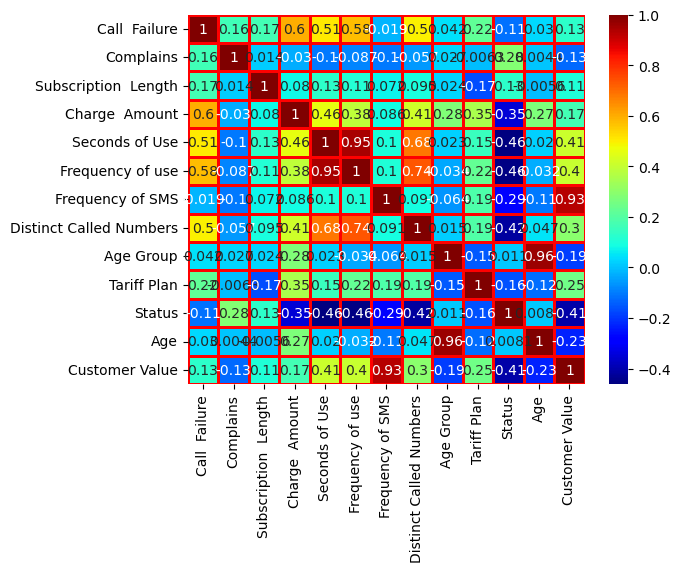

In [60]:
# Feature Selection  
# For xtrain1
import seaborn as sns

cor = x_train1.corr()
sns.heatmap(cor,annot=True,linewidth=2, linecolor="r", cmap="jet")

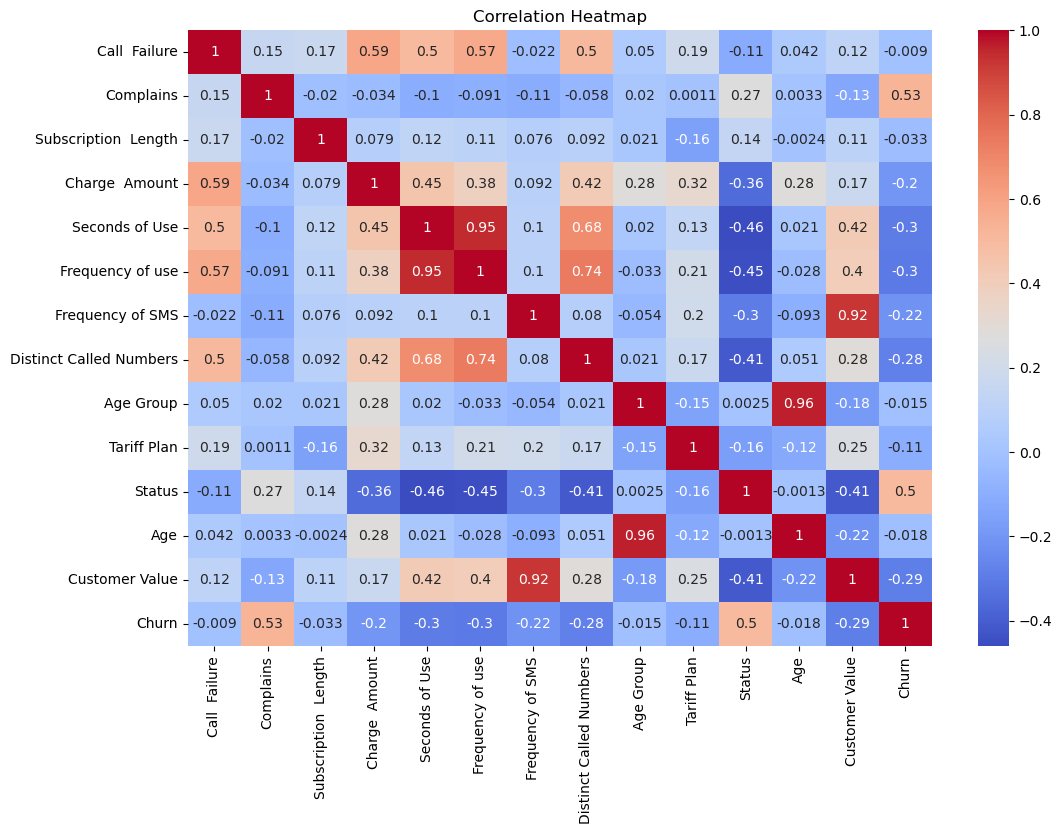

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, confusion_matrix, roc_auc_score
import numpy as np

# Load your dataset (assuming you have it in a CSV format)
df = pd.read_csv('CustomerChurn.csv')

# Example: Correlation Heatmap
plt.figure(figsize=(12,8))
correlation = df.corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()



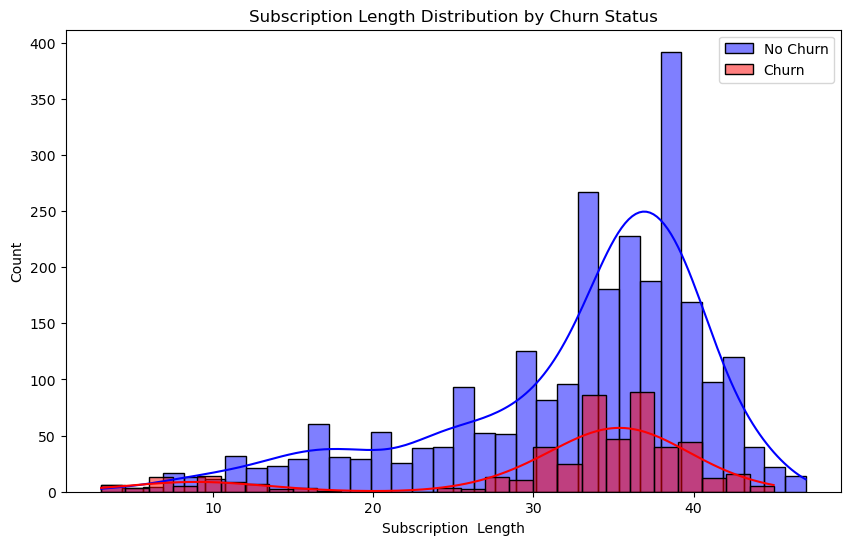

In [4]:
# Example: Distribution Plot
plt.figure(figsize=(10,6))
sns.histplot(df[df['Churn'] == 0]['Subscription  Length'], color='blue', label='No Churn', kde=True)
sns.histplot(df[df['Churn'] == 1]['Subscription  Length'], color='red', label='Churn', kde=True)
plt.title('Subscription Length Distribution by Churn Status')
plt.legend()
plt.show()


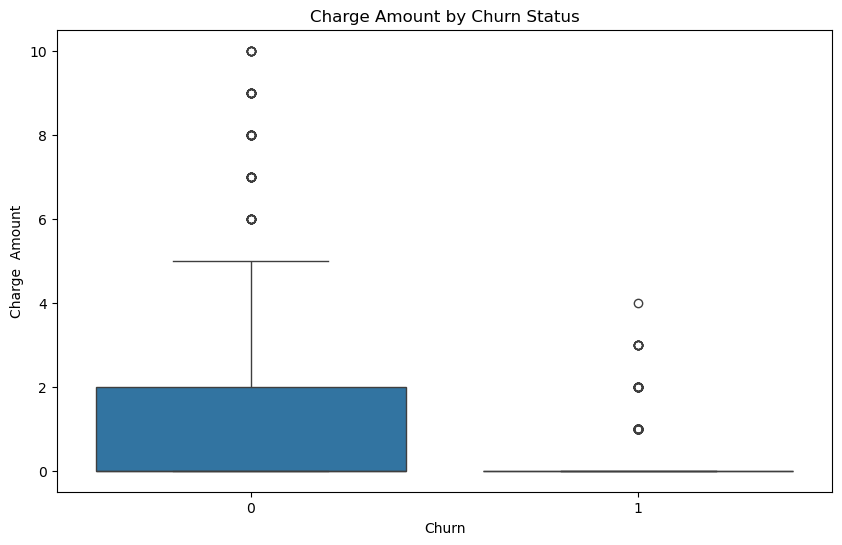

In [6]:
# Example: Box Plot
plt.figure(figsize=(10,6))
sns.boxplot(x='Churn', y= 'Charge  Amount', data=df)
plt.title('Charge Amount by Churn Status')
plt.show()

In [61]:

# function for Feature Selection
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

corr_features = correlation(x_train1, 0.8)# let 0.8 as threshold
x_train1.drop(corr_features,axis=1)
x_test1.drop(corr_features,axis=1)
print(corr_features)
     

{'Frequency of use', 'Customer Value', 'Age'}


<Axes: >

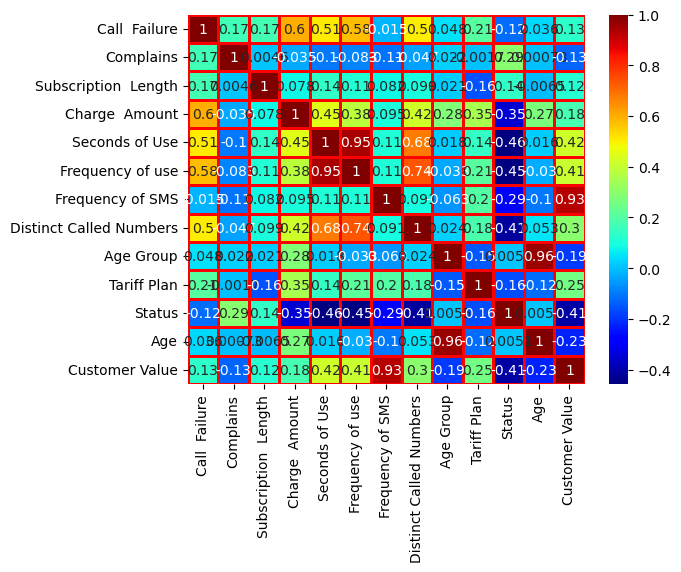

In [62]:

# Feature Selection  
# For xtrain2
import seaborn as sns

cor = x_train2.corr()
sns.heatmap(cor,annot=True,linewidth=2, linecolor="r", cmap="jet")

In [63]:

# function for Feature Selection
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

corr_features = correlation(x_train1, 0.8)# let 0.8 as threshold
x_train2.drop(corr_features,axis=1)
x_test2.drop(corr_features,axis=1)
print(corr_features)

{'Frequency of use', 'Customer Value', 'Age'}


<Axes: >

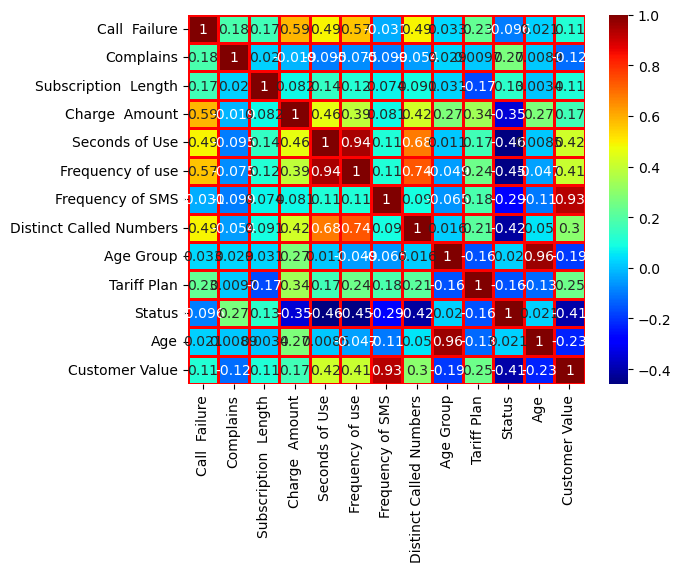

In [64]:
# Feature Selection  
# For xtrain3
import seaborn as sns

cor = x_train3.corr()
sns.heatmap(cor,annot=True,linewidth=2, linecolor="r", cmap="jet")

In [65]:

# function for Feature Selection
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

corr_features = correlation(x_train1, 0.8)# let 0.8 as threshold
x_train3.drop(corr_features,axis=1)
x_test3.drop(corr_features,axis=1)
print(corr_features)

{'Frequency of use', 'Customer Value', 'Age'}


In [66]:
# Classification 6 models
# use perceptron, LogisticRegression, SVC, KNeighborsClassifier, DecisionTreeClassifier, GaussianNB
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
from sklearn.linear_model import Perceptron, LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as pyt

# Perceptron
clf1 = Perceptron(alpha=0.001, l1_ratio=0.2, max_iter=1000)

# logistic regresiion
clf2 = LogisticRegression(penalty="l2", tol=0.001, C=1.0, max_iter=10000)

# svc
clf3 = SVC(C=1.0, kernel="rbf")


# knn
clf4 = KNeighborsClassifier(n_neighbors=5, p=2, metric="minkowski")

# Gaussian NB
clf5 = GaussianNB(priors=None)

# tree
clf6 = DecisionTreeClassifier(criterion="gini", splitter="best", max_depth=3)
 
clf = [clf1,clf2,clf3,clf4,clf5,clf6]
clf_name = ["Per", "LR", "SVC", "KNN" , "GNB", "DTC"]

Per : 0.8804232804232804
LR : 0.8804232804232804
SVC : 0.9079365079365079
KNN : 0.9375661375661376
GNB : 0.728042328042328
DTC : 0.8920634920634921
Per :               precision    recall  f1-score   support

           0       0.88      0.99      0.93       776
           1       0.92      0.36      0.52       169

    accuracy                           0.88       945
   macro avg       0.90      0.68      0.73       945
weighted avg       0.89      0.88      0.86       945

LR :               precision    recall  f1-score   support

           0       0.89      0.98      0.93       776
           1       0.83      0.41      0.55       169

    accuracy                           0.88       945
   macro avg       0.86      0.70      0.74       945
weighted avg       0.88      0.88      0.86       945

SVC :               precision    recall  f1-score   support

           0       0.91      0.99      0.95       776
           1       0.92      0.53      0.67       169

    accuracy     

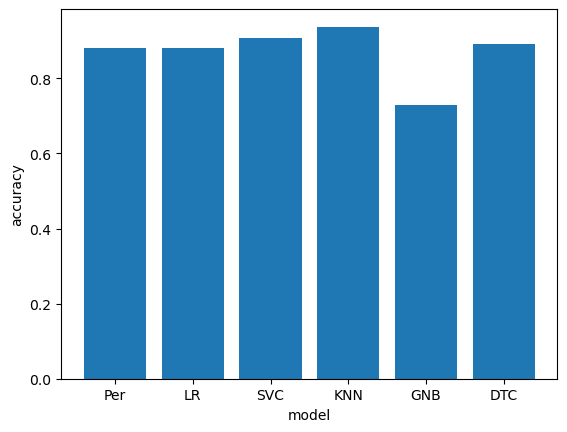

In [67]:
# predict churn using x_train1
acc={}
T={}
for model, model_name in zip(clf, clf_name):
  model.fit(x_train1, y_train1)
  pred = model.predict(x_test1)
  acc[model_name] = accuracy_score(pred,y_test1)
  precision = precision_score(y_test1, pred)
  recall = recall_score(y_test1, pred)
  f1 = f1_score(y_test1, pred)
  # Generate a classification report
  report = classification_report(y_test1, pred)
  T[model_name] = report
for i,j in acc.items():
  print(i,":",j)
for i,j in acc.items():
  print(i,":",T[i])

pyt.ylabel("accuracy")
pyt.xlabel("model")
pyt.bar(acc.keys(),acc.values())
pyt.show()
     

Per : 0.8396825396825397
LR : 0.8825396825396825
SVC : 0.9079365079365079
KNN : 0.9428571428571428
GNB : 0.7317460317460317
DTC : 0.8888888888888888
Per :               precision    recall  f1-score   support

           0       0.96      0.84      0.90       521
           1       0.52      0.85      0.65       109

    accuracy                           0.84       630
   macro avg       0.74      0.85      0.77       630
weighted avg       0.89      0.84      0.85       630

LR :               precision    recall  f1-score   support

           0       0.89      0.98      0.93       521
           1       0.81      0.42      0.55       109

    accuracy                           0.88       630
   macro avg       0.85      0.70      0.74       630
weighted avg       0.88      0.88      0.87       630

SVC :               precision    recall  f1-score   support

           0       0.91      0.99      0.95       521
           1       0.93      0.50      0.65       109

    accuracy    

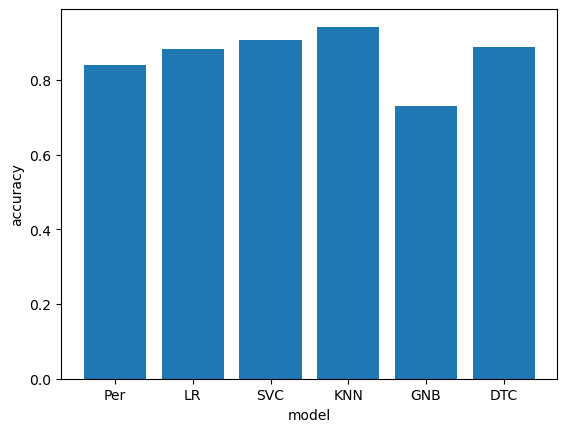

In [68]:
# predict churn using x_train2

acc={}
T={}
for model, model_name in zip(clf, clf_name):
  model.fit(x_train2, y_train2)
  pred = model.predict(x_test2)
  acc[model_name] = accuracy_score(pred,y_test2)
  precision = precision_score(y_test2, pred)
  recall = recall_score(y_test2, pred)
  f1 = f1_score(y_test2, pred)

  # Generate a classification report
  report = classification_report(y_test2, pred)
  T[model_name] = report
for i,j in acc.items():
  print(i,":",j)
for i,j in acc.items():
  print(i,":",T[i])

pyt.ylabel("accuracy")
pyt.xlabel("model")
pyt.bar(acc.keys(),acc.values())
pyt.show()
classi = {"KNN": "Accuracy-94.28571428571428 %"}

C:\Users\Public\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Public\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Public\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Public\anaconda\Lib\site-packages\sklea

Per : 0.8317460317460318
LR : 0.8912698412698413
SVC : 0.9126984126984127
KNN : 0.9396825396825397
GNB : 0.7285714285714285
DTC : 0.8976190476190476
Per :               precision    recall  f1-score   support

           0       0.83      1.00      0.91      1048
           1       0.00      0.00      0.00       212

    accuracy                           0.83      1260
   macro avg       0.42      0.50      0.45      1260
weighted avg       0.69      0.83      0.76      1260

LR :               precision    recall  f1-score   support

           0       0.90      0.98      0.94      1048
           1       0.84      0.44      0.58       212

    accuracy                           0.89      1260
   macro avg       0.87      0.71      0.76      1260
weighted avg       0.89      0.89      0.88      1260

SVC :               precision    recall  f1-score   support

           0       0.91      0.99      0.95      1048
           1       0.90      0.54      0.67       212

    accuracy    

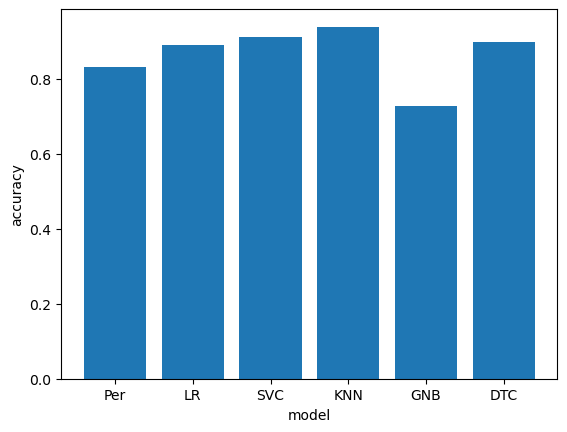

In [69]:
# predict churn using x_train3
acc={}
T={}
for model, model_name in zip(clf, clf_name):
  model.fit(x_train3, y_train3)
  pred = model.predict(x_test3)
  acc[model_name] = accuracy_score(pred,y_test3)
  precision = precision_score(y_test3, pred)
  recall = recall_score(y_test3, pred)
  f1 = f1_score(y_test3, pred)

  # Generate a classification report
  report = classification_report(y_test3, pred)
  T[model_name] = report
for i,j in acc.items():
  print(i,":",j)
for i,j in acc.items():
  print(i,":",T[i])

pyt.ylabel("accuracy")
pyt.xlabel("model")
pyt.bar(acc.keys(),acc.values())
pyt.show()

Linear Regression Metrics:
Accuracy: 0.8814814814814815
Precision: 0.8518518518518519
Recall: 0.40828402366863903
F1 Score: 0.552

Decision Tree Regression Metrics:
Accuracy: 0.9259259259259259
Precision: 0.8113207547169812
Recall: 0.7633136094674556
F1 Score: 0.7865853658536586

Random Forest Regression Metrics:
Accuracy: 0.9375661375661376
Precision: 0.8571428571428571
Recall: 0.7810650887573964
F1 Score: 0.8173374613003096

Support Vector Regression Metrics:
Accuracy: 0.8804232804232804
Precision: 0.8414634146341463
Recall: 0.40828402366863903
F1 Score: 0.549800796812749

Gradient Boosting Regression Metrics:
Accuracy: 0.9301587301587302
Precision: 0.8551724137931035
Recall: 0.7337278106508875
F1 Score: 0.7898089171974523


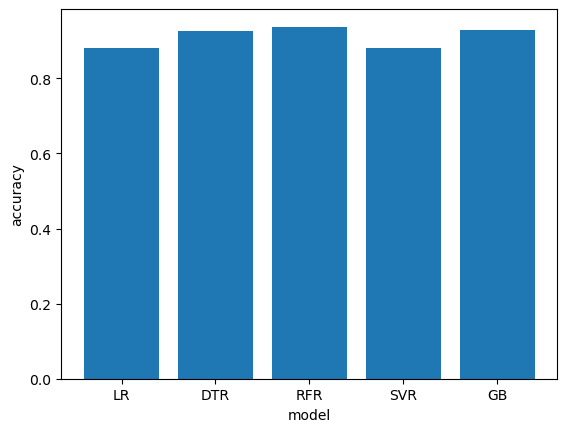

In [70]:
# Regression done using thresold technique as it has output 0 1 
# Linear Regression , DicisionTreeRegression, RandomforestRegressor, GradientBoosting Regressor, SVR
# For (70-30) test split
import numpy as np
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

acc={}
# Linear Regression
linear_reg = LinearRegression()
linear_reg.fit(x_train1, y_train1)
linear_reg_predictions = linear_reg.predict(x_test1)
linear_reg_binary_predictions = np.where(linear_reg_predictions > 0.5, 1, 0)

# Decision Tree Regression
dt_reg = DecisionTreeRegressor(random_state=42)
dt_reg.fit(x_train1, y_train1)
dt_reg_predictions = dt_reg.predict(x_test1)
dt_reg_binary_predictions = np.where(dt_reg_predictions > 0.5, 1, 0)

# Random Forest Regression
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg.fit(x_train1, y_train1)
rf_reg_predictions = rf_reg.predict(x_test1)
rf_reg_binary_predictions = np.where(rf_reg_predictions > 0.5, 1, 0)

# Support Vector Regression (SVR)
svr_reg = SVR(kernel='linear')
svr_reg.fit(x_train1, y_train1)
svr_reg_predictions = svr_reg.predict(x_test1)
svr_reg_binary_predictions = np.where(svr_reg_predictions > 0.5, 1, 0)

# Gradient Boosting Regression
gb_reg = GradientBoostingRegressor(random_state=42)
gb_reg.fit(x_train1, y_train1)
gb_reg_predictions = gb_reg.predict(x_test1)
gb_reg_binary_predictions = np.where(gb_reg_predictions > 0.5, 1, 0)


print("Linear Regression Metrics:")
print("Accuracy:", accuracy_score(y_test1, linear_reg_binary_predictions))
print("Precision:", precision_score(y_test1, linear_reg_binary_predictions))
print("Recall:", recall_score(y_test1, linear_reg_binary_predictions))
print("F1 Score:", f1_score(y_test1, linear_reg_binary_predictions))
acc["LR"] = accuracy_score(y_test1, linear_reg_binary_predictions)
print()

print("Decision Tree Regression Metrics:")
print("Accuracy:", accuracy_score(y_test1, dt_reg_binary_predictions))
print("Precision:", precision_score(y_test1, dt_reg_binary_predictions))
print("Recall:", recall_score(y_test1, dt_reg_binary_predictions))
print("F1 Score:", f1_score(y_test1, dt_reg_binary_predictions))
acc["DTR"] = accuracy_score(y_test1, dt_reg_binary_predictions)
print()

print("Random Forest Regression Metrics:")
print("Accuracy:", accuracy_score(y_test1, rf_reg_binary_predictions))
print("Precision:", precision_score(y_test1, rf_reg_binary_predictions))
print("Recall:", recall_score(y_test1, rf_reg_binary_predictions))
print("F1 Score:", f1_score(y_test1, rf_reg_binary_predictions))
acc["RFR"] = accuracy_score(y_test1, rf_reg_binary_predictions)
print()

print("Support Vector Regression Metrics:")
print("Accuracy:", accuracy_score(y_test1, svr_reg_binary_predictions))
print("Precision:", precision_score(y_test1, svr_reg_binary_predictions))
print("Recall:", recall_score(y_test1, svr_reg_binary_predictions))
print("F1 Score:", f1_score(y_test1, svr_reg_binary_predictions))
acc["SVR"] = accuracy_score(y_test1, svr_reg_binary_predictions)
print()

print("Gradient Boosting Regression Metrics:")
print("Accuracy:", accuracy_score(y_test1, gb_reg_binary_predictions))
print("Precision:", precision_score(y_test1, gb_reg_binary_predictions))
print("Recall:", recall_score(y_test1, gb_reg_binary_predictions))
print("F1 Score:", f1_score(y_test1, gb_reg_binary_predictions))
acc["GB"] = accuracy_score(y_test1, gb_reg_binary_predictions)

pyt.ylabel("accuracy")
pyt.xlabel("model")
pyt.bar(acc.keys(),acc.values())
pyt.show()
     

Linear Regression Metrics:
Accuracy: 0.8825396825396825
Precision: 0.8431372549019608
Recall: 0.3944954128440367
F1 Score: 0.5375

Decision Tree Regression Metrics:
Accuracy: 0.9222222222222223
Precision: 0.8
Recall: 0.7339449541284404
F1 Score: 0.7655502392344498

Random Forest Regression Metrics:
Accuracy: 0.9365079365079365
Precision: 0.8484848484848485
Recall: 0.7706422018348624
F1 Score: 0.8076923076923077

Support Vector Regression Metrics:
Accuracy: 0.8825396825396825
Precision: 0.8431372549019608
Recall: 0.3944954128440367
F1 Score: 0.5375

Gradient Boosting Regression Metrics:
Accuracy: 0.9349206349206349
Precision: 0.8541666666666666
Recall: 0.7522935779816514
F1 Score: 0.8


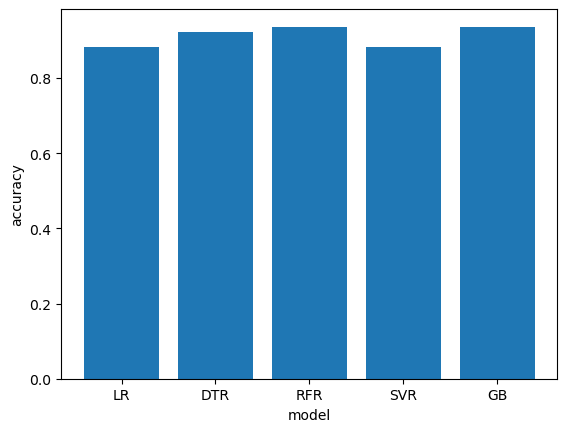

In [71]:
# Regression done using thresold technique as it has output 0 1 
# Linear Regression , DicisionTreeRegression, RandomforestRegressor, GradientBoosting Regressor, SVR
# For (80-20) test split

import numpy as np
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

acc={}
# Linear Regression
linear_reg = LinearRegression()
linear_reg.fit(x_train2, y_train2)
linear_reg_predictions = linear_reg.predict(x_test2)
linear_reg_binary_predictions = np.where(linear_reg_predictions > 0.5, 1, 0)

# Decision Tree Regression
dt_reg = DecisionTreeRegressor(random_state=42)
dt_reg.fit(x_train2, y_train2)
dt_reg_predictions = dt_reg.predict(x_test2)
dt_reg_binary_predictions = np.where(dt_reg_predictions > 0.5, 1, 0)

# Random Forest Regression
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg.fit(x_train2, y_train2)
rf_reg_predictions = rf_reg.predict(x_test2)
rf_reg_binary_predictions = np.where(rf_reg_predictions > 0.5, 1, 0)

# Support Vector Regression (SVR)
svr_reg = SVR(kernel='linear')
svr_reg.fit(x_train2, y_train2)
svr_reg_predictions = svr_reg.predict(x_test2)
svr_reg_binary_predictions = np.where(svr_reg_predictions > 0.5, 1, 0)

# Gradient Boosting Regression
gb_reg = GradientBoostingRegressor(random_state=42)
gb_reg.fit(x_train2, y_train2)
gb_reg_predictions = gb_reg.predict(x_test2)
gb_reg_binary_predictions = np.where(gb_reg_predictions > 0.5, 1, 0)


print("Linear Regression Metrics:")
print("Accuracy:", accuracy_score(y_test2, linear_reg_binary_predictions))
print("Precision:", precision_score(y_test2, linear_reg_binary_predictions))
print("Recall:", recall_score(y_test2, linear_reg_binary_predictions))
print("F1 Score:", f1_score(y_test2, linear_reg_binary_predictions))
acc["LR"] = accuracy_score(y_test2, linear_reg_binary_predictions)
print()

print("Decision Tree Regression Metrics:")
print("Accuracy:", accuracy_score(y_test2, dt_reg_binary_predictions))
print("Precision:", precision_score(y_test2, dt_reg_binary_predictions))
print("Recall:", recall_score(y_test2, dt_reg_binary_predictions))
print("F1 Score:", f1_score(y_test2, dt_reg_binary_predictions))
acc["DTR"] = accuracy_score(y_test2, dt_reg_binary_predictions)
print()

print("Random Forest Regression Metrics:")
print("Accuracy:", accuracy_score(y_test2, rf_reg_binary_predictions))
print("Precision:", precision_score(y_test2, rf_reg_binary_predictions))
print("Recall:", recall_score(y_test2, rf_reg_binary_predictions))
print("F1 Score:", f1_score(y_test2, rf_reg_binary_predictions))
acc["RFR"] = accuracy_score(y_test2, rf_reg_binary_predictions)
print()

print("Support Vector Regression Metrics:")
print("Accuracy:", accuracy_score(y_test2, svr_reg_binary_predictions))
print("Precision:", precision_score(y_test2, svr_reg_binary_predictions))
print("Recall:", recall_score(y_test2, svr_reg_binary_predictions))
print("F1 Score:", f1_score(y_test2, svr_reg_binary_predictions))
acc["SVR"] = accuracy_score(y_test2, svr_reg_binary_predictions)
print()

print("Gradient Boosting Regression Metrics:")
print("Accuracy:", accuracy_score(y_test2, gb_reg_binary_predictions))
print("Precision:", precision_score(y_test2, gb_reg_binary_predictions))
print("Recall:", recall_score(y_test2, gb_reg_binary_predictions))
print("F1 Score:", f1_score(y_test2, gb_reg_binary_predictions))
acc["GB"] = accuracy_score(y_test2, gb_reg_binary_predictions)

pyt.ylabel("accuracy")
pyt.xlabel("model")
pyt.bar(acc.keys(),acc.values())
pyt.show()
     

Linear Regression Metrics:
Accuracy: 0.8936507936507937
Precision: 0.8823529411764706
Recall: 0.42452830188679247
F1 Score: 0.5732484076433121

Decision Tree Regression Metrics:
Accuracy: 0.9246031746031746
Precision: 0.7910447761194029
Recall: 0.75
F1 Score: 0.7699757869249395

Random Forest Regression Metrics:
Accuracy: 0.9436507936507936
Precision: 0.8770053475935828
Recall: 0.7735849056603774
F1 Score: 0.8220551378446115

Support Vector Regression Metrics:
Accuracy: 0.8912698412698413
Precision: 0.8571428571428571
Recall: 0.42452830188679247
F1 Score: 0.5678233438485805

Gradient Boosting Regression Metrics:
Accuracy: 0.9341269841269841
Precision: 0.8524590163934426
Recall: 0.7358490566037735
F1 Score: 0.789873417721519


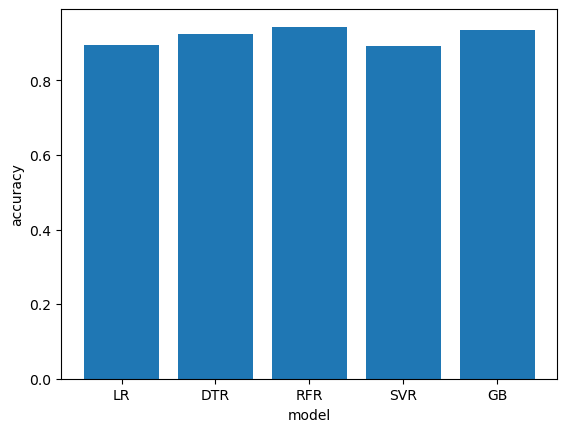

In [72]:
# Regression done using thresold technique as it has output 0 1 
# Linear Regression , DicisionTreeRegression, RandomforestRegressor, GradientBoosting Regressor, SVR
# For (60-40) test split

import numpy as np
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

acc={}
# Linear Regression
linear_reg = LinearRegression()
linear_reg.fit(x_train3, y_train3)
linear_reg_predictions = linear_reg.predict(x_test3)
linear_reg_binary_predictions = np.where(linear_reg_predictions > 0.5, 1, 0)

# Decision Tree Regression
dt_reg = DecisionTreeRegressor(random_state=42)
dt_reg.fit(x_train3, y_train3)
dt_reg_predictions = dt_reg.predict(x_test3)
dt_reg_binary_predictions = np.where(dt_reg_predictions > 0.5, 1, 0)

# Random Forest Regression
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg.fit(x_train3, y_train3)
rf_reg_predictions = rf_reg.predict(x_test3)
rf_reg_binary_predictions = np.where(rf_reg_predictions > 0.5, 1, 0)

# Support Vector Regression (SVR)
svr_reg = SVR(kernel='linear')
svr_reg.fit(x_train3, y_train3)
svr_reg_predictions = svr_reg.predict(x_test3)
svr_reg_binary_predictions = np.where(svr_reg_predictions > 0.5, 1, 0)

# Gradient Boosting Regression
gb_reg = GradientBoostingRegressor(random_state=42)
gb_reg.fit(x_train3, y_train3)
gb_reg_predictions = gb_reg.predict(x_test3)
gb_reg_binary_predictions = np.where(gb_reg_predictions > 0.5, 1, 0)

print("Linear Regression Metrics:")
print("Accuracy:", accuracy_score(y_test3, linear_reg_binary_predictions))
print("Precision:", precision_score(y_test3, linear_reg_binary_predictions))
print("Recall:", recall_score(y_test3, linear_reg_binary_predictions))
print("F1 Score:", f1_score(y_test3, linear_reg_binary_predictions))
acc["LR"] = accuracy_score(y_test3, linear_reg_binary_predictions)
print()

print("Decision Tree Regression Metrics:")
print("Accuracy:", accuracy_score(y_test3, dt_reg_binary_predictions))
print("Precision:", precision_score(y_test3, dt_reg_binary_predictions))
print("Recall:", recall_score(y_test3, dt_reg_binary_predictions))
print("F1 Score:", f1_score(y_test3, dt_reg_binary_predictions))
acc["DTR"] = accuracy_score(y_test3, dt_reg_binary_predictions)
print()

print("Random Forest Regression Metrics:")
print("Accuracy:", accuracy_score(y_test3, rf_reg_binary_predictions))
print("Precision:", precision_score(y_test3, rf_reg_binary_predictions))
print("Recall:", recall_score(y_test3, rf_reg_binary_predictions))
print("F1 Score:", f1_score(y_test3, rf_reg_binary_predictions))
acc["RFR"] = accuracy_score(y_test3, rf_reg_binary_predictions)
print()

print("Support Vector Regression Metrics:")
print("Accuracy:", accuracy_score(y_test3, svr_reg_binary_predictions))
print("Precision:", precision_score(y_test3, svr_reg_binary_predictions))
print("Recall:", recall_score(y_test3, svr_reg_binary_predictions))
print("F1 Score:", f1_score(y_test3, svr_reg_binary_predictions))
acc["SVR"] = accuracy_score(y_test3, svr_reg_binary_predictions)
print()

print("Gradient Boosting Regression Metrics:")
print("Accuracy:", accuracy_score(y_test3, gb_reg_binary_predictions))
print("Precision:", precision_score(y_test3, gb_reg_binary_predictions))
print("Recall:", recall_score(y_test3, gb_reg_binary_predictions))
print("F1 Score:", f1_score(y_test3, gb_reg_binary_predictions))
acc["GB"] = accuracy_score(y_test3, gb_reg_binary_predictions)

pyt.ylabel("accuracy")
pyt.xlabel("model")
pyt.bar(acc.keys(),acc.values())
pyt.show()
     

In [73]:
print("This Result on basis of accuracy:")
print("For Classification:")
print("KNeighborsClassifier is best with",classi["KNN"])
print("With 80 20 split")
print()
print("For Regression:")
print("Random Forest Regression is best with Accuracy-",accuracy_score(y_test3, dt_reg_binary_predictions))
print("With 60 40 split")

This Result on basis of accuracy:
For Classification:
KNeighborsClassifier is best with Accuracy-94.28571428571428 %
With 80 20 split

For Regression:
Random Forest Regression is best with Accuracy- 0.9246031746031746
With 60 40 split


In [74]:
from sklearn.model_selection import train_test_split

# Assuming X and y are defined
# 60-40 split
x_train3, x_test3, y_train3, y_test3 = train_test_split(X, y, test_size=0.4, random_state=0)
print("60/40 split: ")
print("X Train: ", x_train3.shape)
print("X Test: ", x_test3.shape)


60/40 split: 
X Train:  (1890, 13)
X Test:  (1260, 13)


In [75]:
import joblib
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Assuming x_train3 and y_train3 are the training datasets for the 60-40 split
rf_model = RandomForestRegressor()
rf_model.fit(x_train3, y_train3)

# Making predictions
rf_reg_predictions = rf_model.predict(x_test3)

# Binary classification for evaluation metrics
rf_reg_binary_predictions = [1 if pred > 0.5 else 0 for pred in rf_reg_predictions]

# Evaluating the model
print("Random Forest Regression Metrics:")
print("Accuracy:", accuracy_score(y_test3, rf_reg_binary_predictions))
print("Precision:", precision_score(y_test3, rf_reg_binary_predictions))
print("Recall:", recall_score(y_test3, rf_reg_binary_predictions))
print("F1 Score:", f1_score(y_test3, rf_reg_binary_predictions))

# Save the model
joblib.dump(rf_model, 'random_forest_model.joblib')



Random Forest Regression Metrics:
Accuracy: 0.9428571428571428
Precision: 0.868421052631579
Recall: 0.7783018867924528
F1 Score: 0.8208955223880597


['random_forest_model.joblib']

In [1]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import joblib
import pandas as pd

# Load the dataset
df = pd.read_csv('CustomerChurn.csv')

# Preprocess the dataset (same as before)
df = df.drop_duplicates()
df['Status'] = df.Status.replace((1, 2), (0, 1))

# Define features (X) and target (y)
X = df.drop(columns=['Churn'])
y = df['Churn']

# Standardize numerical features
numerical_features = X.select_dtypes(include=['float64', 'int64'])
standard_scaler = StandardScaler()
X[numerical_features.columns] = standard_scaler.fit_transform(numerical_features)

# Split the data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

# Initialize and train the KNeighborsClassifier model
knn_model = KNeighborsClassifier(n_neighbors=5)  # You can adjust the number of neighbors
knn_model.fit(x_train, y_train)

# Make predictions
knn_predictions = knn_model.predict(x_test)

# Evaluate the model
print("KNeighborsClassifier Metrics:")
print("Accuracy:", accuracy_score(y_test, knn_predictions))
print("Precision:", precision_score(y_test, knn_predictions))
print("Recall:", recall_score(y_test, knn_predictions))
print("F1 Score:", f1_score(y_test, knn_predictions))

# Save the model
joblib.dump(knn_model, 'knn_model.joblib')


KNeighborsClassifier Metrics:
Accuracy: 0.95
Precision: 0.8698630136986302
Recall: 0.7696969696969697
F1 Score: 0.8167202572347267


['knn_model.joblib']